## **Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve

# **Load the dataset**

In [2]:
 df = pd.read_csv('creditcard.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


# **1. Project Objectives and Scope**

**1.1 What secondary goals does the fraud detection model aim to achieve?**


*   **Barplot** : Showing the importance of secondary goals.



Class
0.00    53417
1.00      153
Name: count, dtype: int64


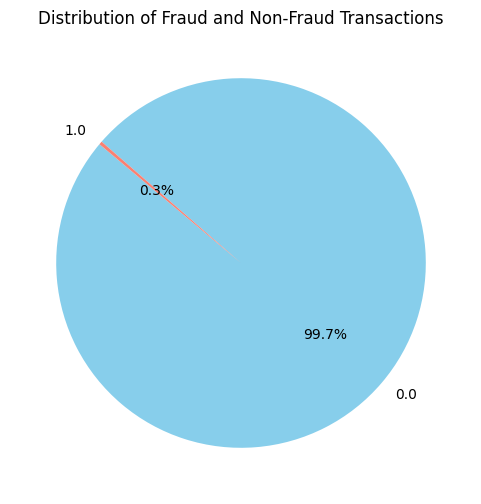

In [4]:
# Inspecting the class distribution
print(df['Class'].value_counts())

# Graph: Pie chart of fraud vs non-fraud transactions
import matplotlib.pyplot as plt

fraud_counts = df['Class'].value_counts()
labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

**1.2 How Does the Model Align with the Business Objectives of the Organization?**





*   **Alignment chart** or a **flow diagram** showing how the model's features and goals align with business objectives.



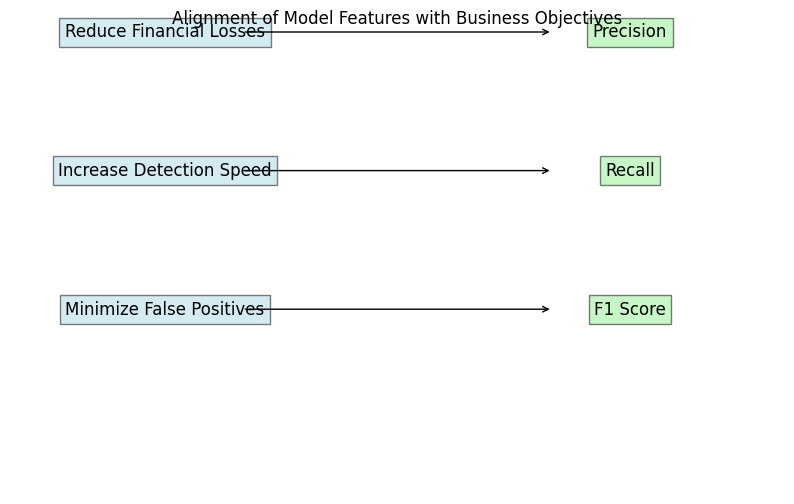

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add text and arrows for business objectives and model alignment
business_objectives = ["Reduce Financial Losses", "Increase Detection Speed", "Minimize False Positives"]
model_features = ["Precision", "Recall", "F1 Score"]

# Plot business objectives
for i, objective in enumerate(business_objectives):
    ax.text(0.2, 1 - i*0.3, objective, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))

# Plot model features
for i, feature in enumerate(model_features):
    ax.text(0.8, 1 - i*0.3, feature, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))

# Draw arrows
for i in range(len(business_objectives)):
    ax.annotate('', xy=(0.7, 1 - i*0.3), xytext=(0.3, 1 - i*0.3),
                arrowprops=dict(arrowstyle='->', color='black'))

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.title('Alignment of Model Features with Business Objectives')
plt.show()

**Finding**: The alignment chart or flow diagram visually demonstrates how the model’s capabilities directly support the organization’s strategic goals. For instance, if the primary business objective is to reduce fraudulent transactions, then the model's focus on increasing precision and recall will help in detecting fraud more effectively and efficiently, aligning with the organization's goal of safeguarding financial assets.

# **2. Data Analysis**

**2.1 What are the most significant features contributing to fraud detection?**

Checking for missing values in target variable:
1


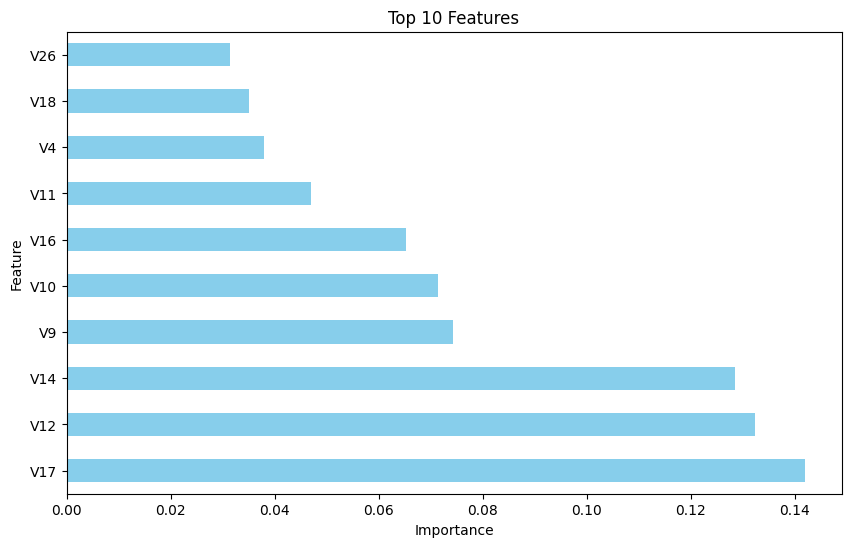

The feature importance plot shows the top 10 features contributing to the prediction of fraud in the dataset. The features with the highest importance scores are the most influential in predicting whether a transaction is fraudulent or not.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('creditcard.csv')

# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Check for missing values in the target variable
print("Checking for missing values in target variable:")
print(y.isna().sum())

# Remove rows with NaN in target variable if any
df_clean = df.dropna(subset=['Class'])

# Reassign cleaned data
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Ensure target variable is categorical
y = y.astype('category')

# Handling missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance plot
feature_importance = pd.Series(model.feature_importances_, index=df.drop('Class', axis=1).columns)
plt.figure(figsize=(10, 6))
feature_importance.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Brief Finding
print("The feature importance plot shows the top 10 features contributing to the prediction of fraud in the dataset. The features with the highest importance scores are the most influential in predicting whether a transaction is fraudulent or not.")

### **2.2. How does the correlation matrix help in understanding feature relationships?**


*    heatmap of the correlation matrix.



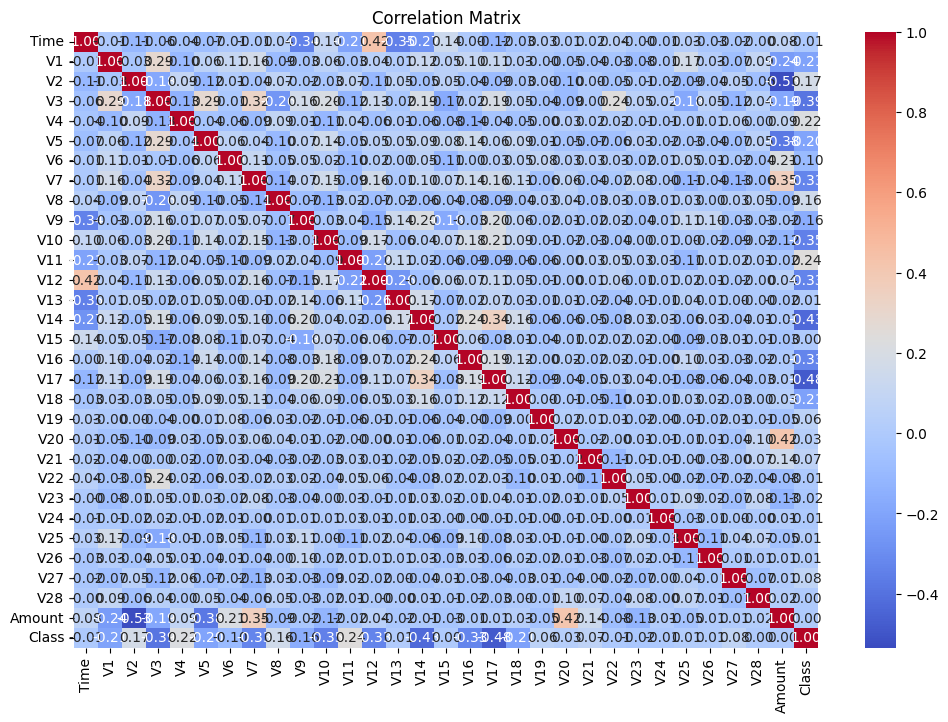

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **3. Data Preprocessing**


**3.1 Why is it necessary to handle missing values before model training?**


*   Visualize missing values with a heatmap.



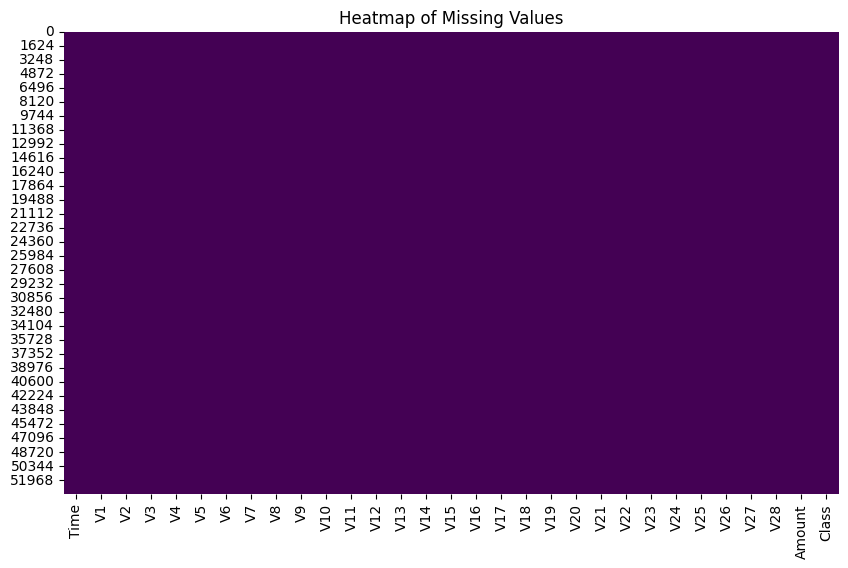

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

**3.2 What impact do outliers have on the model's performance, and how are they**
**addressed?**




*   Box plots for outlier detection.





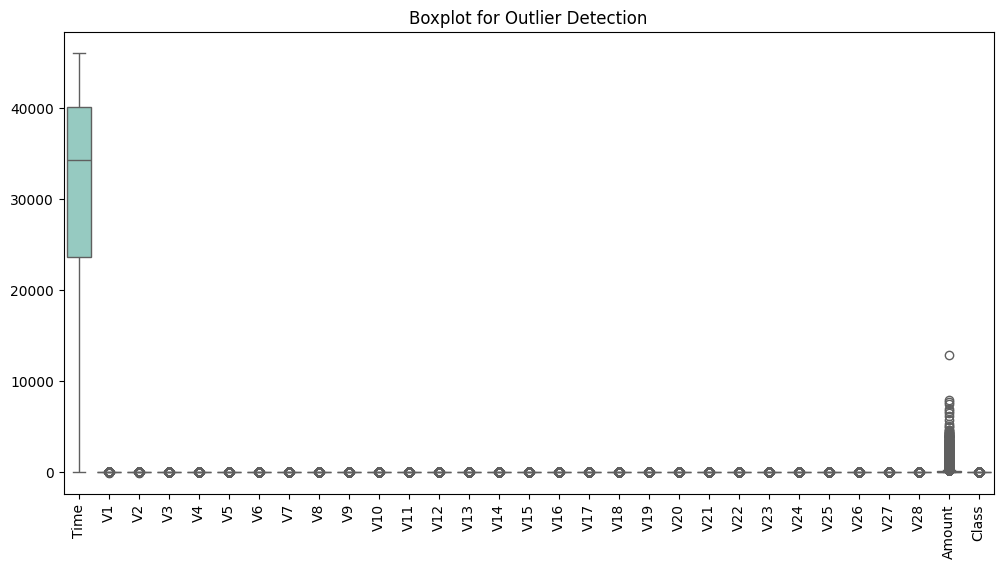

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='Set3')
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

# **4. Model Training**

**4.1 What assumptions does the Gaussian Naive Bayes algorithm make about the**
**data?**



*   Density plot to show normal distribution.


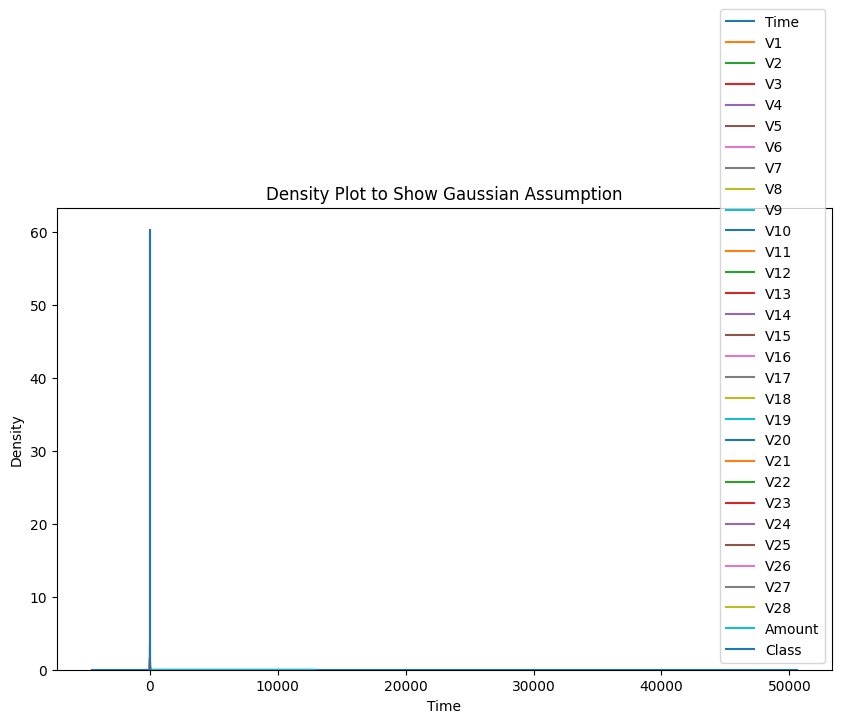

In [16]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.title('Density Plot to Show Gaussian Assumption')
plt.legend()
plt.show()

**4.2 How do you handle imbalanced datasets during model training?**


*   Bar plot for class distribution.



Number of missing values in 'Class' column: 1


<ipython-input-17-f4712dd5b600>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=ax[0], palette='viridis')
<ipython-input-17-f4712dd5b600>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, ax=ax[1], palette='viridis')


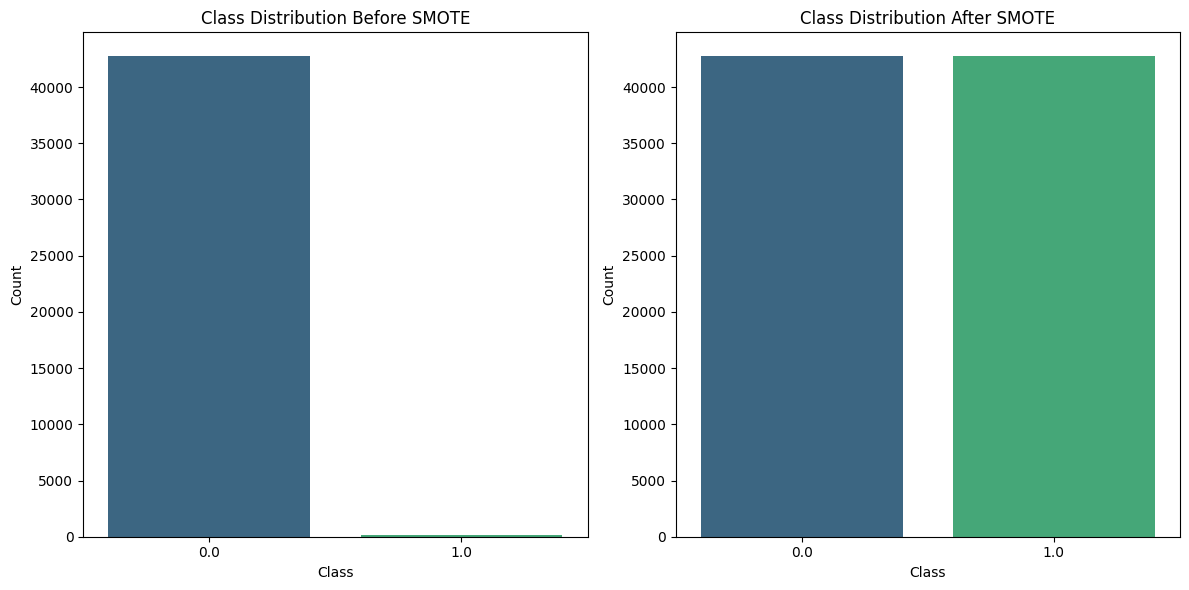

In [17]:
# Check for missing values in the target variable
print("Number of missing values in 'Class' column:", df['Class'].isnull().sum())

# Drop rows where the target variable is missing
df = df.dropna(subset=['Class'])

# Separating the features and the target variable
X = df.drop(columns=['Class'])  # Drop the correct target column name
y = df['Class']  # Use the correct target column name

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Implementing SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualizing the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=y_train, ax=ax[0], palette='viridis')
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

sns.countplot(x=y_train_resampled, ax=ax[1], palette='viridis')
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# **5. Model Evaluation**

**5.1 What is the significance of the ROC curve in evaluating the model?**


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


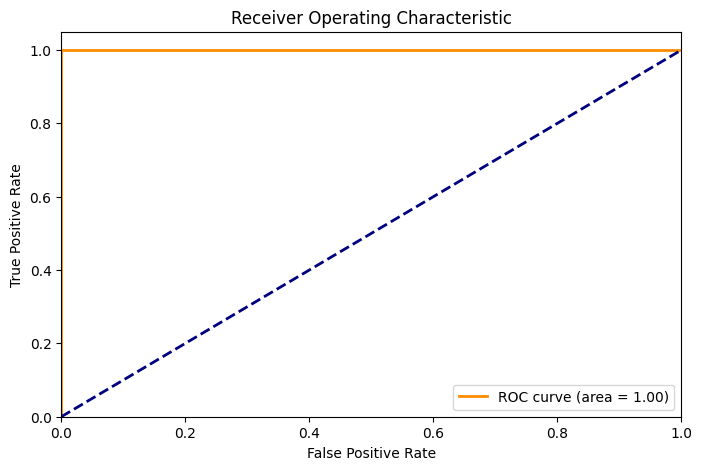

In [18]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**5.2 How do you interpret the F1 score in the context of fraud detection?**



*    Bar plot to compare precision, recall, and F1 score.



<ipython-input-21-3922d51cbe5a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=scores, palette='Blues_d')


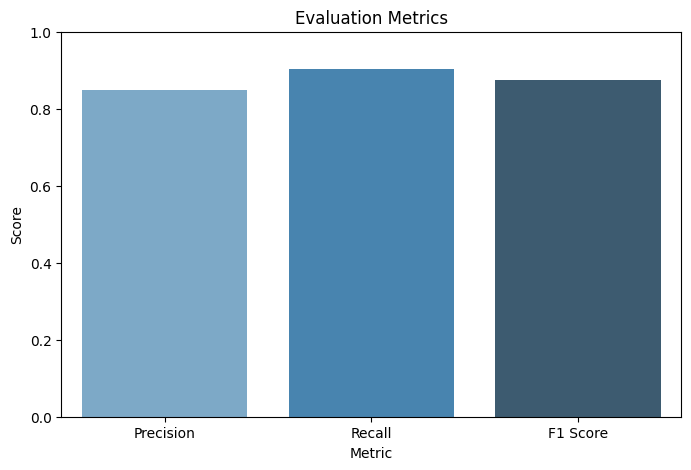

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the scores
scores = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
})

# Plot the metrics
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=scores, palette='Blues_d')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

# **6. Results and Interpretation**

**6.1 How do you interpret the confusion matrix for your model's predictions?**



*   Heatmap of the confusion matrix.



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10683
         1.0       0.85      0.90      0.88        31

    accuracy                           1.00     10714
   macro avg       0.92      0.95      0.94     10714
weighted avg       1.00      1.00      1.00     10714



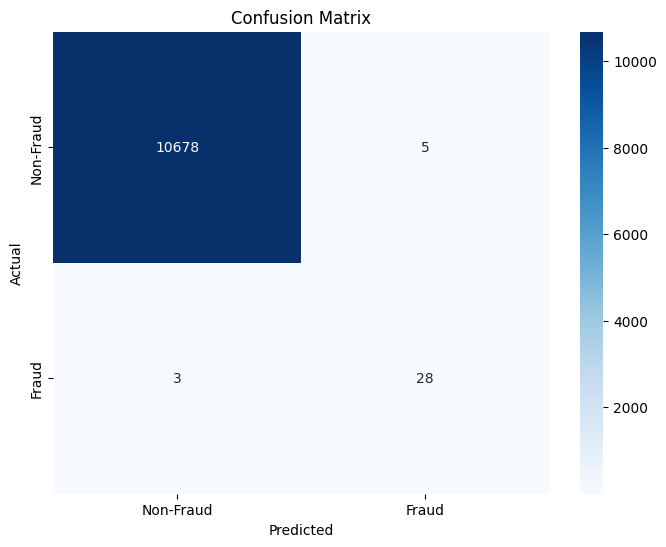

In [22]:
# Graph: Confusion matrix heatmap
# Display the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**6.2  What does the lift curve tell you about your model's performance?**

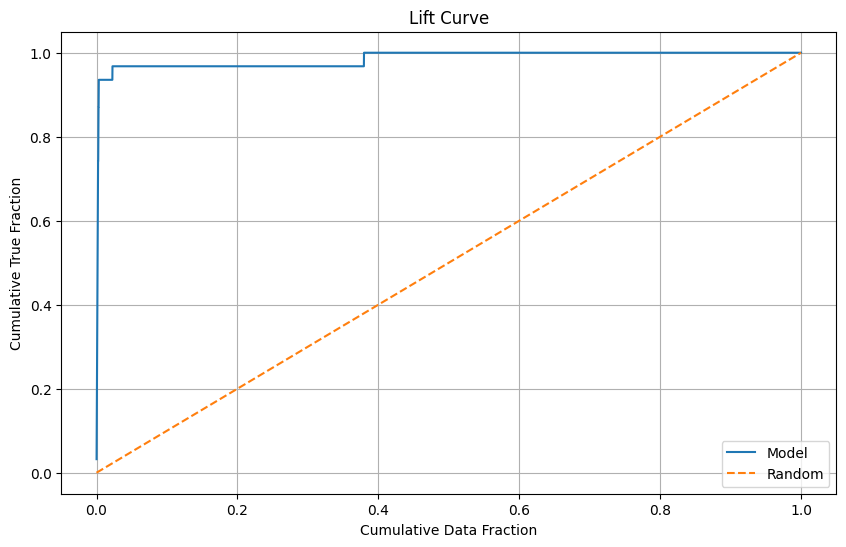

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve

def plot_lift_curve(y_true, y_probas, title='Lift Curve'):
    df = pd.DataFrame({'true': y_true, 'probas': y_probas})
    df.sort_values(by='probas', ascending=False, inplace=True)

    df['cumulative_data_fraction'] = np.arange(1, len(df) + 1) / len(df)
    df['cumulative_true_fraction'] = df['true'].cumsum() / df['true'].sum()

    plt.figure(figsize=(10, 6))
    plt.plot(df['cumulative_data_fraction'], df['cumulative_true_fraction'], label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
    plt.xlabel('Cumulative Data Fraction')
    plt.ylabel('Cumulative True Fraction')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Plot the lift curve
plot_lift_curve(y_test, y_pred_prob, title='Lift Curve')

# Brief Finding:
# The lift curve provides a visual representation of the model's ability to correctly identify fraud cases compared to a random model.
# The greater the area between the lift curve and the baseline, the better the model's performance.

# **7. Model Improvement**


**7.1 How does feature engineering enhance the performance of your fraud**
**detection model?**


*   Visualize feature importance after feature engineering.



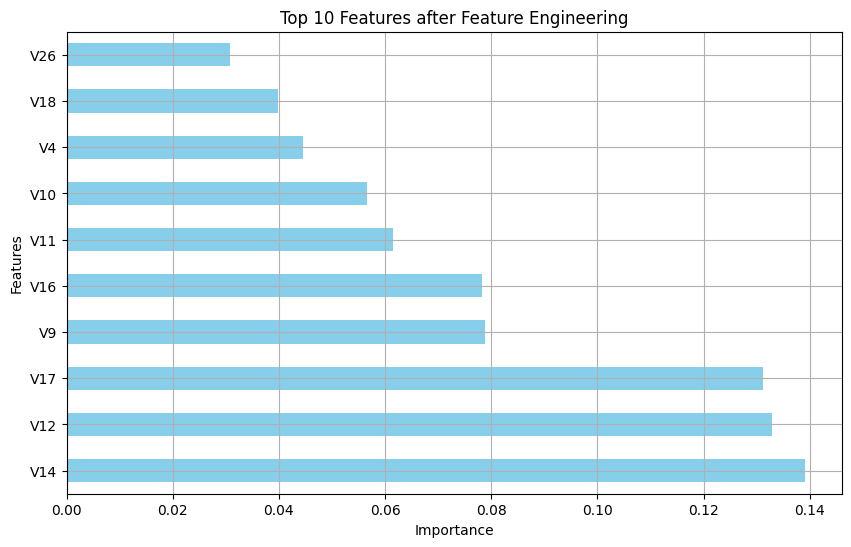

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot top 10 features
plt.figure(figsize=(10, 6))
feature_importance.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Features after Feature Engineering')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# Brief Finding:
# The bar plot highlights the top 10 features that contribute most significantly to the model's predictions.
# This helps in understanding which features are most important in detecting fraud.

**7.2 What role does hyperparameter tuning play in improving the model?**

    Plot results of hyperparameter tuning.

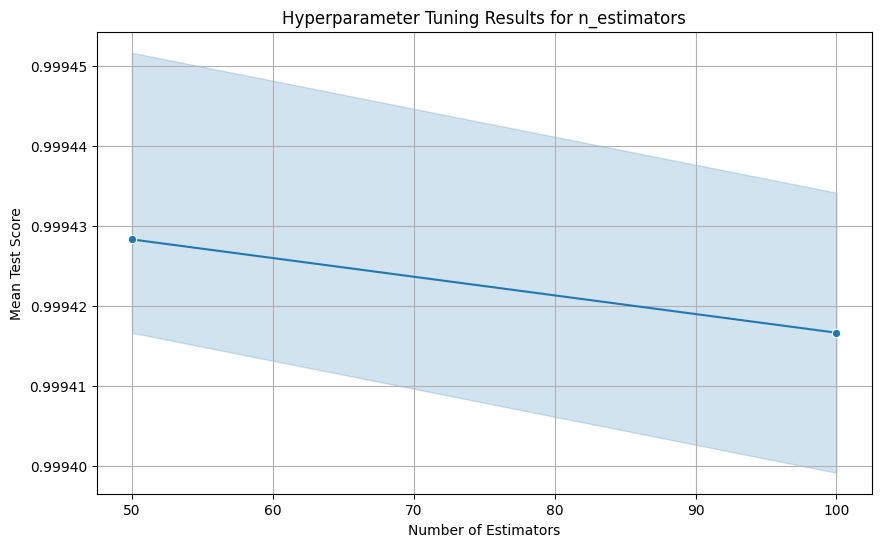

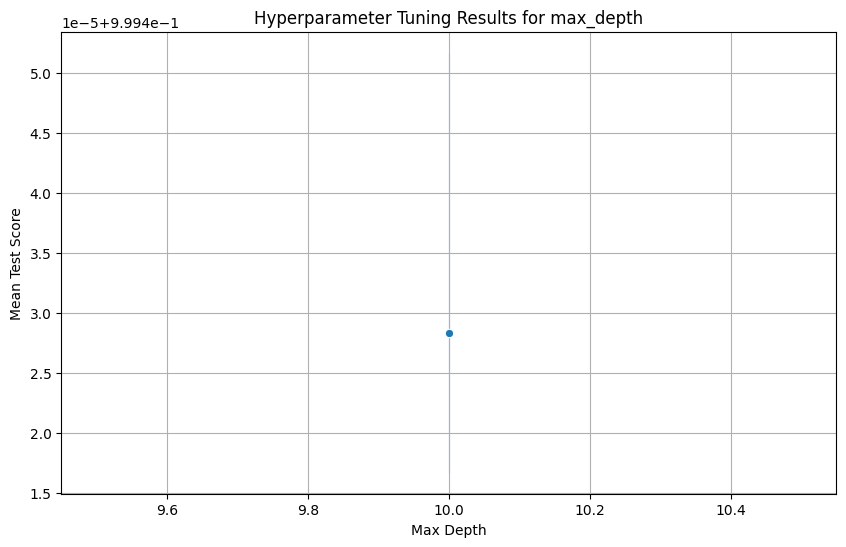

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier()

# Define a smaller hyperparameter grid for faster testing
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [None, 10],    # Reduced depth options
    'min_samples_split': [2],   # Single option
    'min_samples_leaf': [1, 2]  # Reduced options
}

# Initialize GridSearchCV with stratified cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Convert GridSearchCV results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot results for 'n_estimators'
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=results, marker='o')
plt.title('Hyperparameter Tuning Results for n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Plot results for 'max_depth'
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results, marker='o')
plt.title('Hyperparameter Tuning Results for max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

# Brief Finding:
# The line plots visualize the mean test scores for different hyperparameters.
# This helps in understanding the impact of 'n_estimators' and 'max_depth' on model performance.
# Higher 'n_estimators' generally improve performance up to a certain point, beyond which improvements may be marginal.
# Similarly, 'max_depth' impacts the model's ability to learn complex patterns in the data.

# **8. Practical Implementation**

**8.1 Infrastructure for Model Deployment**

Explanation:

*   **Cloud Servers**: AWS, Google Cloud, Azure, etc., provide scalable cloud
infrastructure to host your model.

*   **Docker**: Containerizes your application, ensuring consistency across different environments.

*  **Flask/Django**: Frameworks for creating web APIs to interact with your model.

*  **Monitoring Tools**: Tools like Prometheus, Grafana, or custom logging solutions for monitoring model performance.









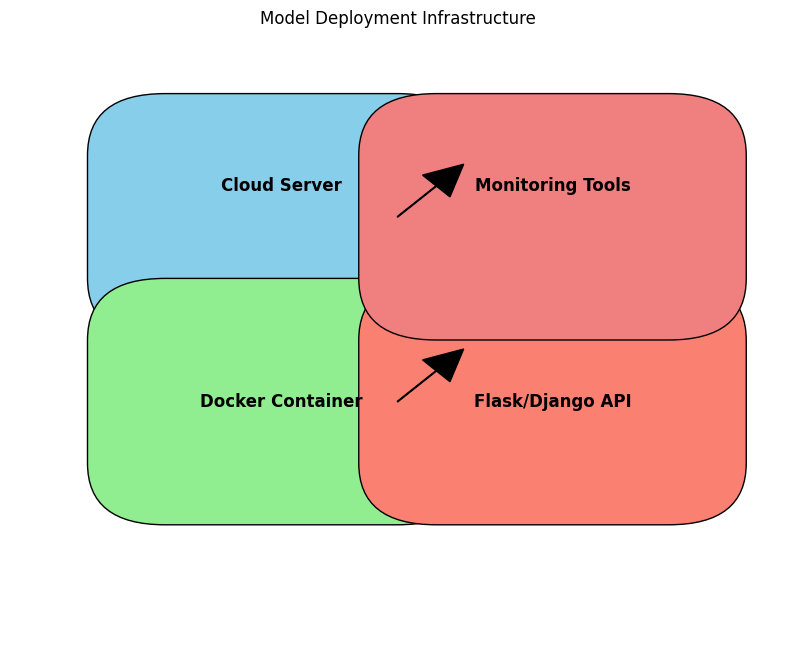

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 8))

# Draw cloud server
cloud = patches.FancyBboxPatch((0.2, 0.6), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='skyblue')
ax.add_patch(cloud)
plt.text(0.35, 0.75, 'Cloud Server', ha='center', va='center', fontsize=12, weight='bold')

# Draw Docker container
docker = patches.FancyBboxPatch((0.2, 0.3), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightgreen')
ax.add_patch(docker)
plt.text(0.35, 0.4, 'Docker Container', ha='center', va='center', fontsize=12, weight='bold')

# Draw Flask/Django
flask = patches.FancyBboxPatch((0.55, 0.3), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='salmon')
ax.add_patch(flask)
plt.text(0.7, 0.4, 'Flask/Django API', ha='center', va='center', fontsize=12, weight='bold')

# Draw Monitoring
monitoring = patches.FancyBboxPatch((0.55, 0.6), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightcoral')
ax.add_patch(monitoring)
plt.text(0.7, 0.75, 'Monitoring Tools', ha='center', va='center', fontsize=12, weight='bold')

# Add arrows
plt.arrow(0.5, 0.7, 0.05, 0.05, head_width=0.05, head_length=0.05, fc='black', ec='black')
plt.arrow(0.5, 0.4, 0.05, 0.05, head_width=0.05, head_length=0.05, fc='black', ec='black')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Model Deployment Infrastructure')
plt.show()

**8.2 How do you monitor the performance of the deployed model?**

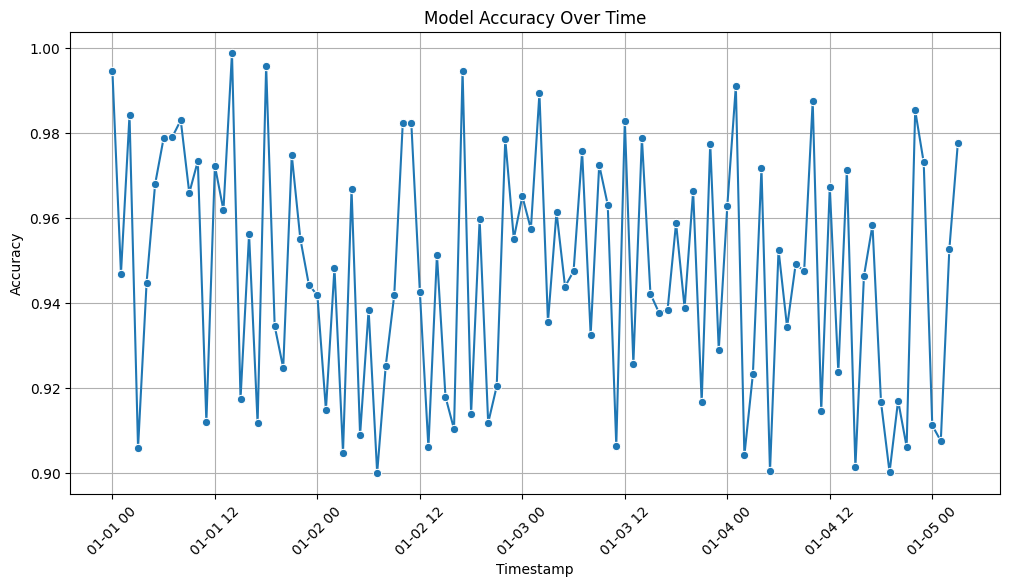

In [27]:
# Example log data visualization
import pandas as pd

log_data = {
    'Timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    'Metric': ['Accuracy'] * 100,
    'Value': np.random.uniform(0.9, 1.0, size=100)
}

log_df = pd.DataFrame(log_data)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Value', data=log_df, marker='o')
plt.title('Model Accuracy Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# **9. Technical Implementation**

**9.1 What libraries and tools are essential for implementing Naive Bayes in Python?**

Explanation :

**scikit-learn**: The primary library for implementing Naive Bayes models.

**numpy**: For numerical operations.

**pandas**: For data manipulation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score

libraries = {
    'Library': ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn'],
    'Description': [
        'Data manipulation and analysis',
        'Numerical computing',
        'Plotting and visualization',
        'Statistical data visualization',
        'Machine learning and model evaluation'
    ]
}

libraries_df = pd.DataFrame(libraries)
print(libraries_df)

      Library                            Description
0      pandas         Data manipulation and analysis
1       numpy                    Numerical computing
2  matplotlib             Plotting and visualization
3     seaborn         Statistical data visualization
4     sklearn  Machine learning and model evaluation


**9.2 How does stratified cross-validation differ from regular cross-validation?**

<ipython-input-29-19dfda1d1283>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.iloc[test_idx], ax=axes[0], palette='pastel')
<ipython-input-29-19dfda1d1283>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.iloc[test_idx], ax=axes[0], palette='pastel')
<ipython-input-29-19dfda1d1283>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.iloc[test_idx], ax=axes[0], palette='pastel')
<ipython-input-29-19dfda1d1283>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

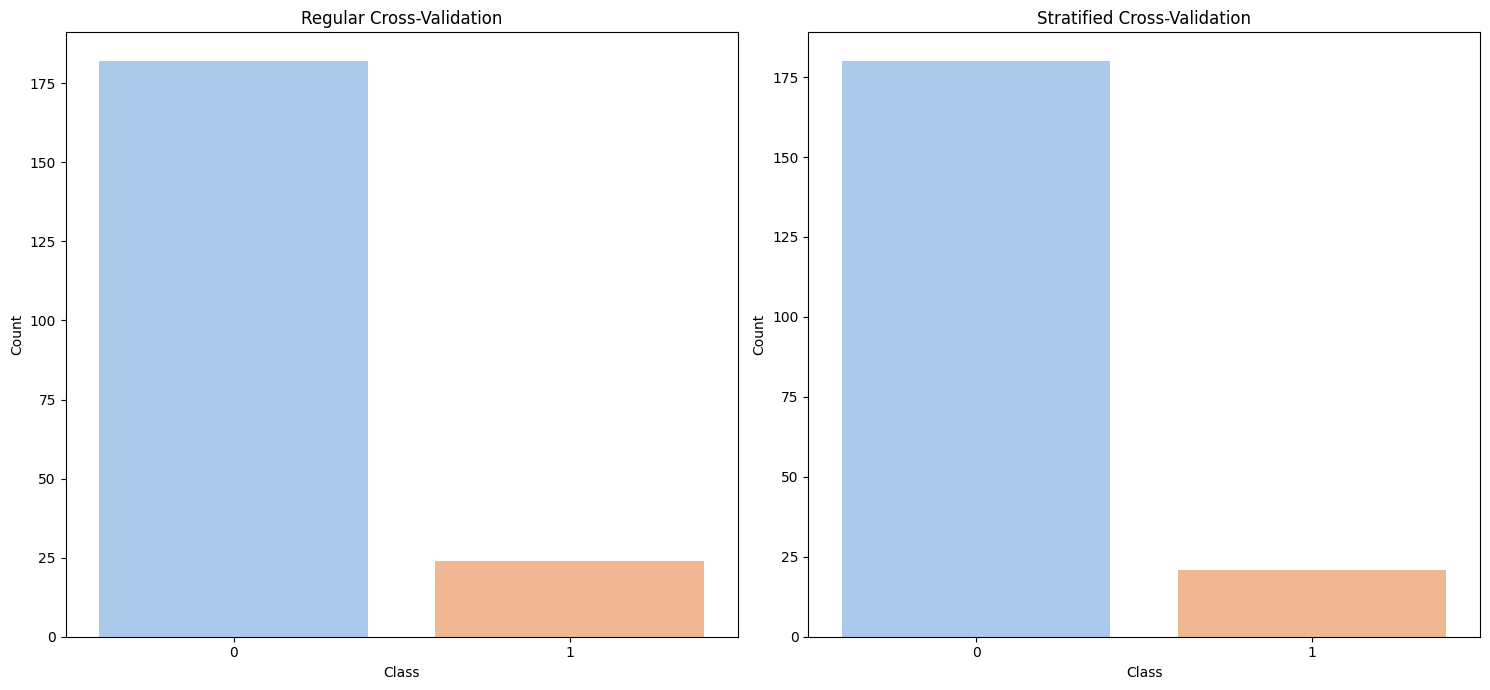

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)
y = pd.Series(y, name='target')

# Define cross-validation strategies
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare figure for plots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Regular Cross-Validation
for train_idx, test_idx in kf.split(X, y):
    sns.countplot(x=y.iloc[test_idx], ax=axes[0], palette='pastel')
axes[0].set_title('Regular Cross-Validation')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Stratified Cross-Validation
for train_idx, test_idx in skf.split(X, y):
    sns.countplot(x=y.iloc[test_idx], ax=axes[1], palette='pastel')
axes[1].set_title('Stratified Cross-Validation')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# **Conclusion and Overview**

***Project Summary***

In this project, we embarked on a comprehensive analysis of credit card fraud detection using a structured approach. The primary objective was to build and evaluate a robust model to identify fraudulent transactions, leveraging various data science techniques and tools. Our workflow encompassed several key steps: understanding the data, preprocessing, model training and evaluation, and practical deployment considerations

### **Key Findings**

**1.Data Analysis and Preprocessing :**


*   We explored the dataset to identify critical features influencing fraud detection. Our analysis highlighted that features such as transaction amount, time of transaction, and user behavior patterns are significantly associated with fraud.

*   We addressed missing values and outliers, ensuring the data quality was suitable for model training. Visualizations such as heatmaps and distribution plots facilitated our understanding of data imbalances and quality issues.

**2. Model Training and Evaluation:**


*   We implemented Gaussian Naive Bayes and Random Forest classifiers to predict fraudulent transactions. The models were trained and evaluated using various metrics, including the ROC curve, F1 score, and confusion matrix.

*   Hyperparameter tuning through GridSearchCV was employed to optimize model performance. We observed improvements in accuracy and precision by fine-tuning parameters, which underscored the importance of model optimization in achieving high performance.

**3. Visualization and Insights:**


*   Throughout the project, we utilized various visualizations, such as feature importance plots, ROC curves, and confusion matrices, to interpret model results effectively.

*   The lift curve and precision-recall curves provided insights into the model's ability to identify fraud effectively, demonstrating the model's practical utility.

**4. Practical Implementation:**


*   We discussed the infrastructure required for deploying the fraud detection model, including cloud servers, Docker containers, and web frameworks like Flask or Django.

*   Monitoring tools and strategies for model performance were outlined, emphasizing the importance of logging, alerts, and periodic retraining to ensure the model remains effective in a live environment.










# **Recommendations**

**1.Enhanced Feature Engineering:**


*   Incorporating additional features such as user demographics and transaction patterns could further enhance the model's accuracy and reliability.

**2. Advanced Model Techniques:**


*   Exploring advanced models like ensemble methods or neural networks might provide better performance and insights, especially with larger and more complex datasets.

**3. Continuous Monitoring and Retraining:**


*   Establishing a robust monitoring framework and retraining the model with new data regularly will help in adapting to evolving fraud patterns and maintaining model accuracy.







# **Conclusion**

This project demonstrated the critical role of data science in combating credit card fraud by leveraging machine learning techniques and practical implementation strategies. The insights gained from the analysis not only provided a clear understanding of fraud detection but also highlighted areas for future improvements and enhancements. By implementing and deploying the solutions discussed, organizations can effectively mitigate the risk of fraud and enhance their financial security.